In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [9]:
# Import dataset
df = pd.read_csv('bike_buyers.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [5]:
df.shape

(1000, 13)

In [4]:
df.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object



## Handling Missing Values


In [5]:
#count null value in each columns
df.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [6]:
#count null value in each rows
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    0
999    0
Length: 1000, dtype: int64

In [7]:
# Delete observation without gender
df.drop(df[pd.isnull(df['Gender'])].index, inplace = True)

# Delete observation without cars
df.drop(df[pd.isnull(df['Cars'])].index, inplace = True)

# Delete observation without children
df.drop(df[pd.isnull(df['Children'])].index, inplace = True)

# Delete observation without marital status
df.drop(df[pd.isnull(df['Marital Status'])].index, inplace = True)

# Delete observation without home owner
df.drop(df[pd.isnull(df['Home Owner'])].index, inplace = True)


df.shape



(962, 13)

## Exploratory data analysis



In [6]:
age_means = df.groupby('Marital Status')['Age'].mean()

income_means = df.groupby('Region')['Income'].mean()
# Transform age_means into a dictionary
map_age_means = age_means.to_dict()

# Transform income_means income into a dictionary
map_income_means = income_means.to_dict()

In [9]:
# Impute age based on marital status
idx_nan_age = df.loc[pd.isnull(df['Age'])].index
df.loc[idx_nan_age, 'Age'] = df['Marital Status'].loc[idx_nan_age].map(map_age_means)

# Impute income based on region
idx_nan_income = df.loc[pd.isnull(df['Income'])].index
df.loc[idx_nan_income, 'Income'] = df['Region'].loc[idx_nan_income].map(map_income_means)

# Change purchased bike value into int
df['Purchased Bike'] = df['Purchased Bike'].map({'Yes' : 1.0, 'No' : 0.0})

<AxesSubplot:xlabel='Marital Status', ylabel='Purchased Bike'>

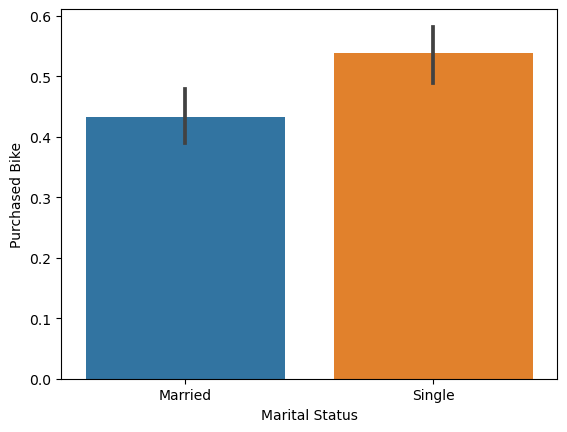

In [10]:
# Transform into categorical 
df['Marital Status'] = pd.Categorical(df['Marital Status'])

# Plot 
sns.barplot(x = 'Marital Status', y = 'Purchased Bike', data = df)

As we can see, about 55% of the customer with marital status single buy the bike. Meanwhile, about 45% of married customers buy the bike. Although the difference is not too far, this still can give us an insight though. So we'll keep this column as an input.

<AxesSubplot:xlabel='Gender', ylabel='Purchased Bike'>

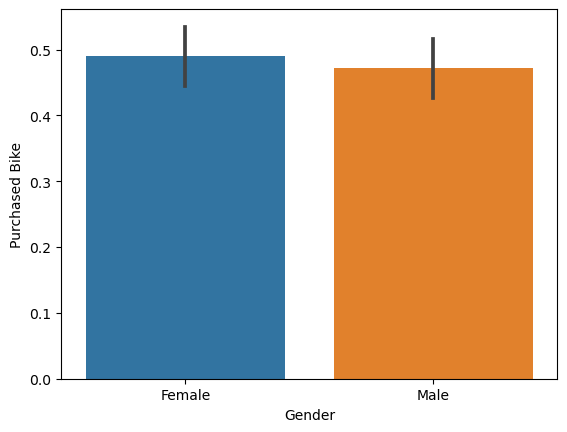

In [11]:
## Gender
# We think that the percentage of males buying a bike will be higher than that of females, as we know males 
# prefer something related to sports.

sns.barplot(x = 'Gender', y = 'Purchased Bike', data = df)

<AxesSubplot:xlabel='Children', ylabel='Purchased Bike'>

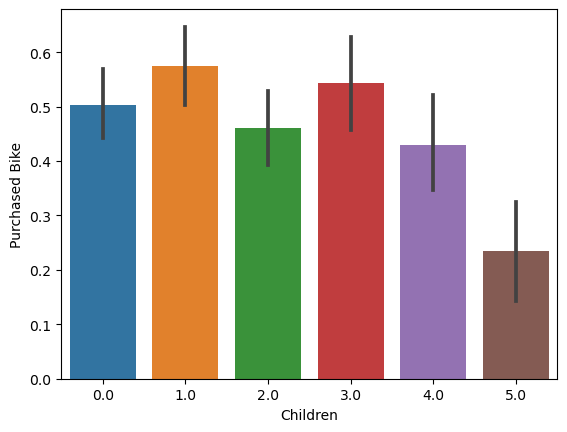

In [12]:
# Children
sns.barplot(x = 'Children', y = 'Purchased Bike', data = df)

Seems like customers who have no child will be our main target as we see on the chart that customers with no child have tendency to buy a bike.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Partial College'),
  Text(2, 0, 'High School'),
  Text(3, 0, 'Partial High School'),
  Text(4, 0, 'Graduate Degree')])

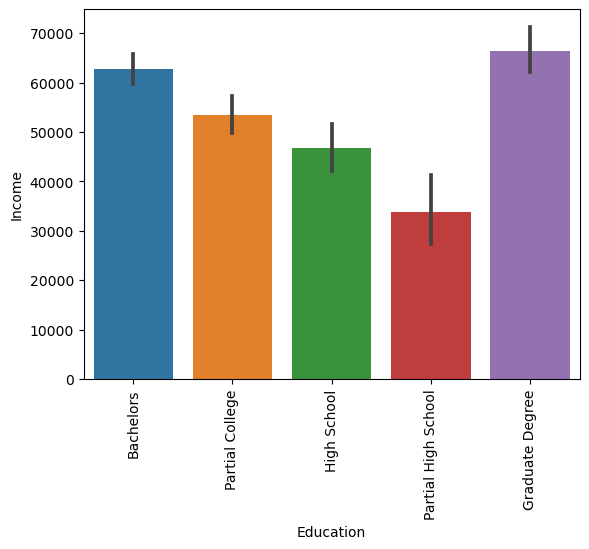

In [13]:
# Plot Education vs Income
sns.barplot(x = 'Education', y = 'Income', data = df)
plt.xticks(rotation = 90)

The result shows that customers with higher education will buy the bike. The reason is the higher the education of the customer, the higher income they will earn.

<AxesSubplot:xlabel='Commute Distance', ylabel='Purchased Bike'>

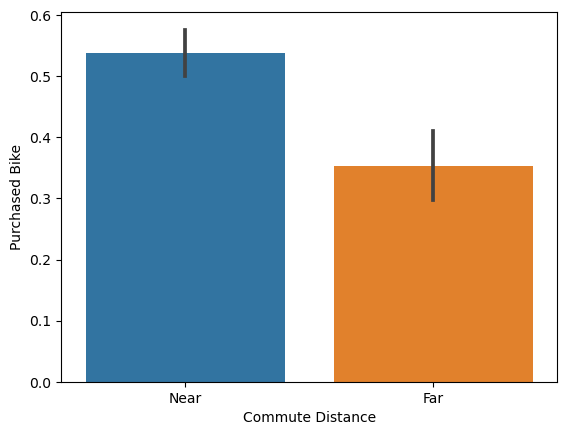

In [14]:
# Transform commute distance into near and far
distance = {'0-1 Miles' : 'Near',
            '1-2 Miles' : 'Near',
            '2-5 Miles' : 'Near',
            '5-10 Miles' : 'Far',
            '10+ Miles' : 'Far'}

df['Commute Distance'] = df['Commute Distance'].map(distance)

# Plot 
sns.barplot(x = 'Commute Distance', y = 'Purchased Bike', data = df)

As we see the result, customers who have 'Near' commute distance have higher chances to buy the bike. So, this customer will become our target for marketing purposes.

## Prediction


In [15]:
#making copy of original data for prediction

data = df;
data.head()


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,Near,Europe,42.0,0.0
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,Near,Europe,43.0,0.0
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,Near,Europe,60.0,0.0
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,Near,Europe,36.0,1.0
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,Near,Europe,50.0,0.0


In [16]:
label_encoder = preprocessing.LabelEncoder()
data['Marital Status']= label_encoder.fit_transform(data['Marital Status']) 
data['Purchased Bike']= label_encoder.fit_transform(data['Purchased Bike'])
data['Commute Distance']= label_encoder.fit_transform(data['Commute Distance'])
data['Home Owner']= label_encoder.fit_transform(data['Home Owner']) 
data['Occupation']= label_encoder.fit_transform(data['Occupation']) 
data['Education']= label_encoder.fit_transform(data['Education']) 
data['Gender']= label_encoder.fit_transform(data['Gender']) 
data['Region']= label_encoder.fit_transform(data['Region'])

data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,40000.0,1.0,0,4,1,0.0,1,0,42.0,0
1,24107,0,1,30000.0,3.0,3,0,1,1.0,1,0,43.0,0
2,14177,0,1,80000.0,5.0,3,3,0,2.0,1,0,60.0,0
4,25597,1,1,30000.0,0.0,0,0,0,0.0,1,0,36.0,1
5,13507,0,0,10000.0,2.0,3,2,1,0.0,1,0,50.0,0


In [17]:
# dropping id  from data set
data.drop('ID',axis=1,inplace=True)



In [18]:
data.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,0,0,40000.0,1.0,0,4,1,0.0,1,0,42.0,0
1,0,1,30000.0,3.0,3,0,1,1.0,1,0,43.0,0
2,0,1,80000.0,5.0,3,3,0,2.0,1,0,60.0,0
4,1,1,30000.0,0.0,0,0,0,0.0,1,0,36.0,1
5,0,0,10000.0,2.0,3,2,1,0.0,1,0,50.0,0


In [19]:
X = data.drop(columns='Purchased Bike',axis=1) # Input
Y = data['Purchased Bike']  #ouput

In [20]:
X.head()

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
0,0,0,40000.0,1.0,0,4,1,0.0,1,0,42.0
1,0,1,30000.0,3.0,3,0,1,1.0,1,0,43.0
2,0,1,80000.0,5.0,3,3,0,2.0,1,0,60.0
4,1,1,30000.0,0.0,0,0,0,0.0,1,0,36.0
5,0,0,10000.0,2.0,3,2,1,0.0,1,0,50.0


In [21]:
Y.head()

0    0
1    0
2    0
4    1
5    0
Name: Purchased Bike, dtype: int64

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1) #giving 10% for Test and rest for test


In [23]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,Y_train)
model

DecisionTreeClassifier(max_depth=3)

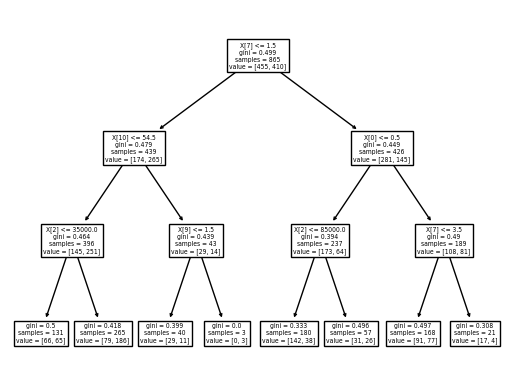

In [24]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

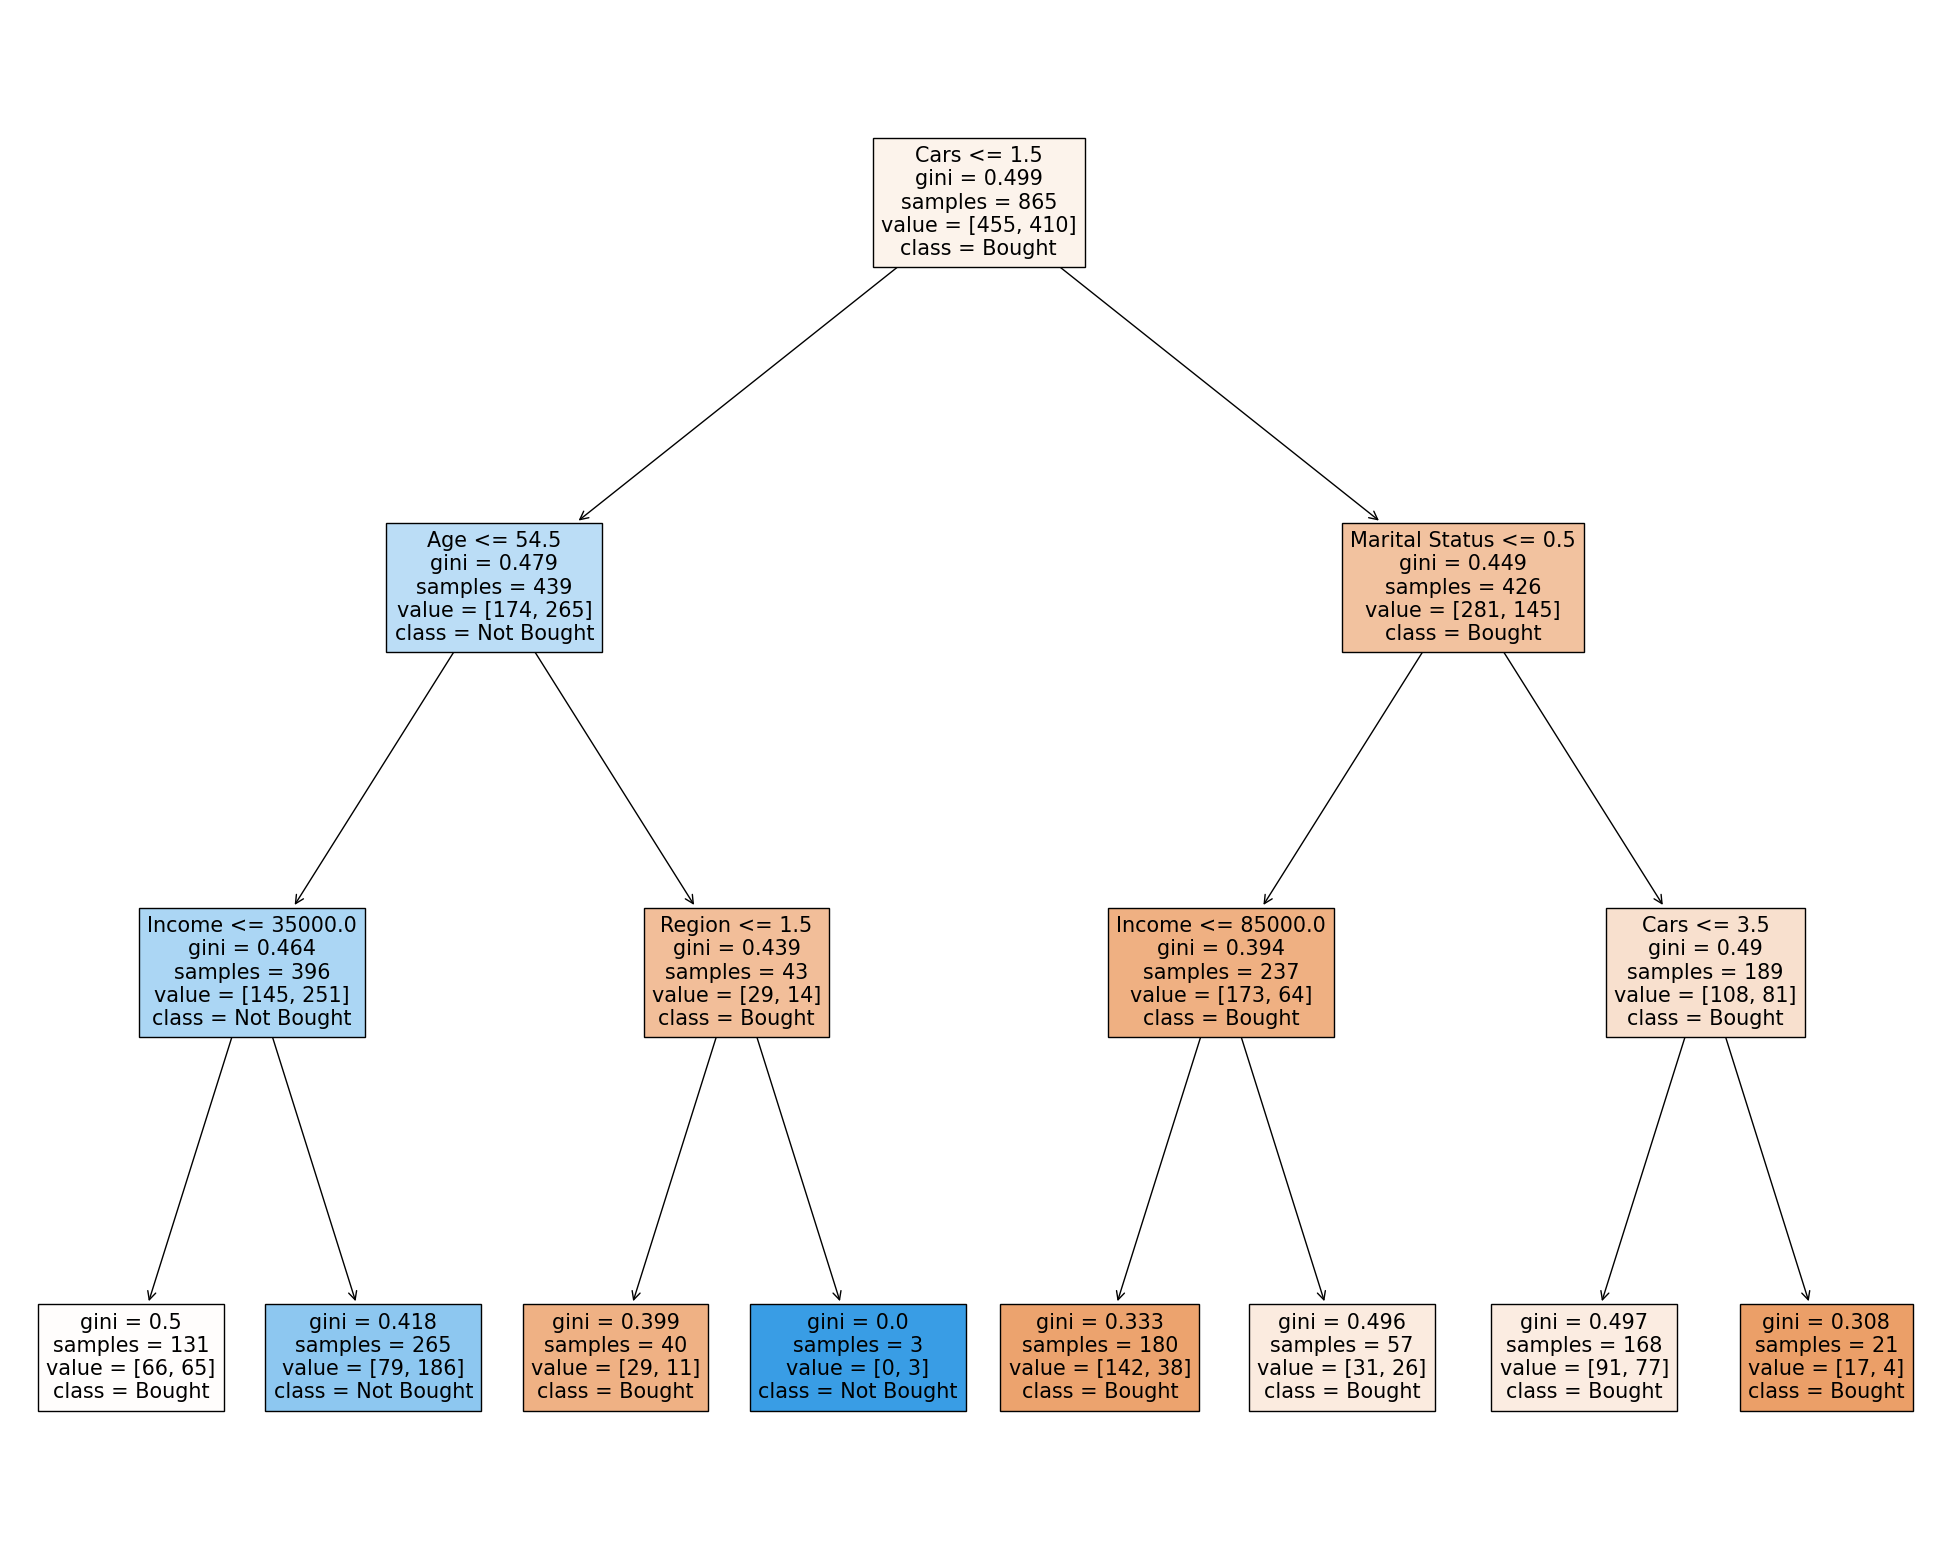

In [25]:
fn=['Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age']
cn=['Bought', 'Not Bought']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names = fn, 
               class_names=cn, filled=True)

In [26]:
#Predicting on test data
prediction = model.predict(X_test) # predicting on test data set 

prediction

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
#Predicting on test data
accuracy_score(Y_test, prediction)

0.4329896907216495